## Chinese character evolution pre-session
### John Burt<br/>Portland Data Science Group<br/>Applied Data Science Meetup series

### Basic methods and details about this dataset:

- Read PNG image file directories, parse filenames to create pandas dataframe with sample info.

- Category (character ID and era) frequency stats.

- Visualize the character dataset 

In [5]:
# basic notebook setup

# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np


### Parse datafiles to create sample info dataframe



In [7]:
import os
import re

code = [] # character code (converted to int)
era = [] # era
index = [] # index of sample for this code and era
path = [] # file path to read image data

sourcetop = 'pngdata' # name of dir holding image data

# Seek through data folder for PNG files
for dirpath, dirnames, filelist in os.walk(top=sourcetop):
    # change any \ to /
    srcdir = dirpath.replace('\\','/')
    # look for any PNG files in the current folder
    for fname in filelist:
        if fname[-3:]=='png':
            # get image file path
            path.append(srcdir+'/'+fname)
            # parse filename to get image category data
            parts = re.split('/|-|_|\.',fname)
            code.append(int(parts[0], 16)) # convert character code str to int
            era.append(parts[1])
            index.append(int(parts[2]))

# create info dataframe
df = pd.DataFrame( 
    {
    'code' : code, 
    'era' : era, 
    'id' : index, 
    'path' : path
    } )

df.head()

,code,era,id,path
0,42048,chuxi,1,pngdata/a440/a440-chuxi_001.png
1,42048,chuxi,2,pngdata/a440/a440-chuxi_002.png
2,42048,chuxi,4,pngdata/a440/a440-chuxi_004.png
3,42048,chuxi,5,pngdata/a440/a440-chuxi_005.png
4,42048,chuxi,6,pngdata/a440/a440-chuxi_006.png


### sample frequencies

Histogram of # samples of each character code (all eras combined).

Note: there is one character code that has 710 samples. I excluded it from the histo range.

min #samples: 1, max #samples: 710

[710 236 212 208 197 195 193 193 169 166 164 161 158 156 154 147 145 145
 129 124 123 120 114 105 101 101  94  93  92  91  91  79  79  79  74  72
  70  67  67  66  66  65  65  63  62  61  56  56  56  52  51  51  49  47
  46  44  43  42  41  41  40  39  38  37  37  37  35  34  34  33  33  32
  31  30  29  28  28  28  26  26  26  25  25  25  22  22  21  21  20  20
  20  18  18  18  18  17  17  16  16  16  16  15  15  14  14  14  13  13
  13  13  13  13  13  12  12  12  11  11  10  10  10  10   9   9   9   8
   8   8   8   7   7   7   7   7   6   6   6   6   6   6   5   5   5   5
   5   5   5   4   4   4   4   4   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   2   2   2   2   2   2   2   2   2   2   2   2   1
   1   1   1   1   1   1]


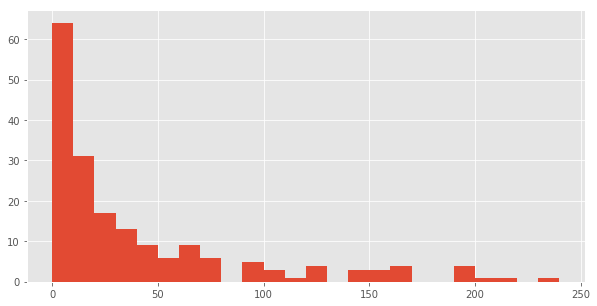

In [24]:
codes = df.code.unique() # get list of codes
counts = []
# cound samples of each code
for code in codes:
    counts.append((df.code==code).sum())

# sort list by sample counts, descending order
idx =  np.flip(np.argsort(counts), axis=0)

print('min #samples: %d, max #samples: %d\n'%(min(counts), max(counts)))

print(np.array(counts)[idx])

plt.figure(figsize=(10,5))
pd.Series(counts)[np.argsort(counts)].hist(bins=list(range(0,250,10)));



### List character codes that meet minimum sample criteria


In [30]:

# specify here the min # samples for each era:
#  chuxi, jinwen, oracle, smallseal
minsamples = [50, 50, 0, 0]

okcodes = []

print('code\t#chuxi\t#jinwen\t#oracle\t#smallseal')
for code in codes[idx]:
    if ((df.id[(df.code==code) & (df.era=='chuxi')].unique().shape[0] >= minsamples[0]) &
        (df.id[(df.code==code) & (df.era=='jinwen')].unique().shape[0] >= minsamples[1]) &
        (df.id[(df.code==code) & (df.era=='oracle')].unique().shape[0] >= minsamples[2]) &
        (df.id[(df.code==code) & (df.era=='smallseal')].unique().shape[0] >= minsamples[3]) 
       ):
        okcodes.append(code)
        print('%4X\t%3d\t%3d\t%3d\t%3d'%(
            code, 
            df.id[(df.code==code) & (df.era=='chuxi')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='jinwen')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='oracle')].unique().shape[0],
            df.id[(df.code==code) & (df.era=='smallseal')].unique().shape[0],
        ))
        
print("\n%d codes met min criteria of "%(len(okcodes)),minsamples)


code	#chuxi	#jinwen	#oracle	#smallseal
A4A7	604	105	  1	  0
A4EB	103	107	  2	  0
A453	146	 61	  1	  0
A548	143	 52	  2	  0
A46C	 64	124	  2	  3
B6C0	111	 54	  2	  2
B0A8	 95	 67	  1	  3
AAF7	 79	 83	  0	  2
A4A3	101	 55	  2	  0
A4BD	 86	 67	  1	  0
A4FD	 60	 80	  3	  2

11 codes met min criteria of  [50, 50, 0, 0]


### Load image data into numpy array

A440 chuxi 1 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0]


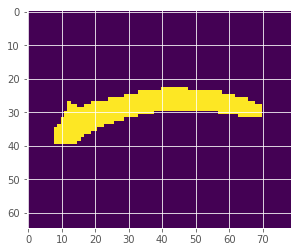

In [72]:
from PIL import Image

# read image, convert to int, and invert so that 1=ink, 0=whitespace
arr = 1-np.asarray(Image.open(df.path[0])).astype(int)

plt.imshow(arr)

print('%X'%(df.code[0]), df.era[0], df.id[0], arr[30,:])
                                         

### View some images

View the top N characters that met the above criteria

Note: I use the PIL module here for image display instead of scipy imageio, even though it's a bit of a pain, because imageio is being depreciated and so the code will eventually break if it is used.

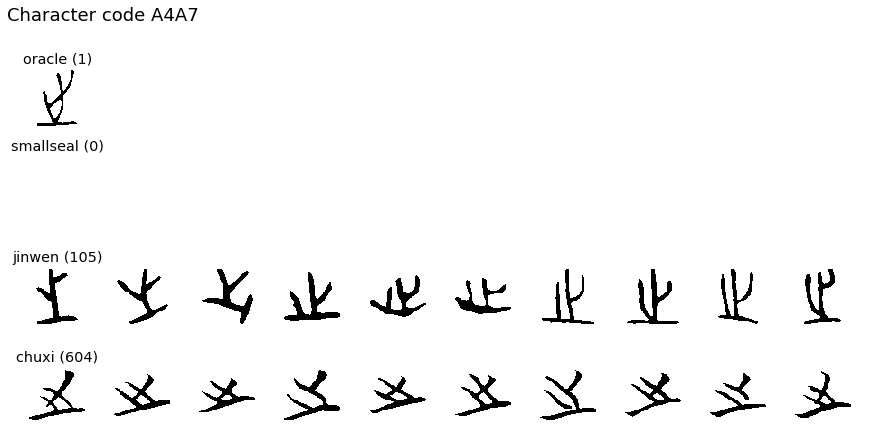

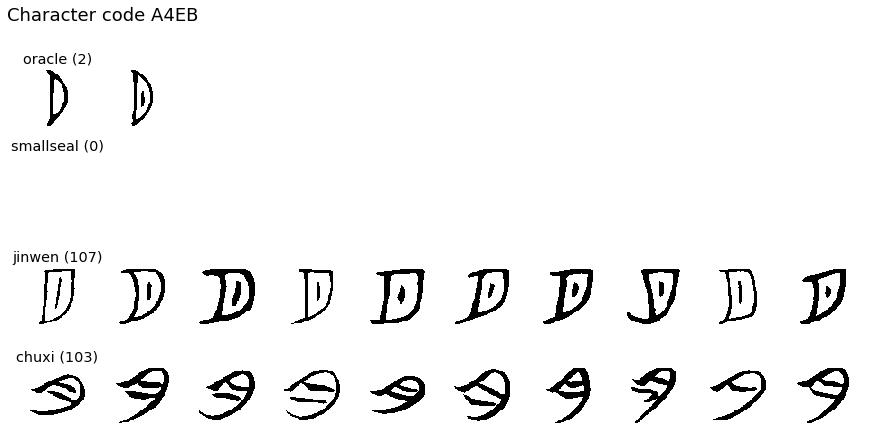

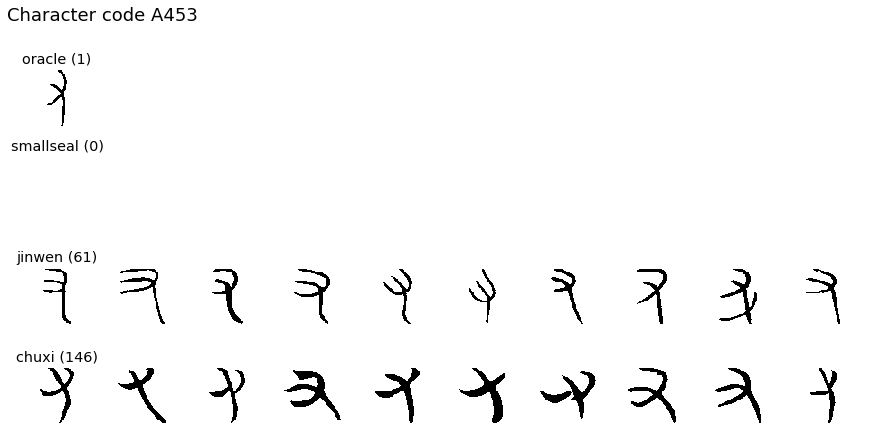

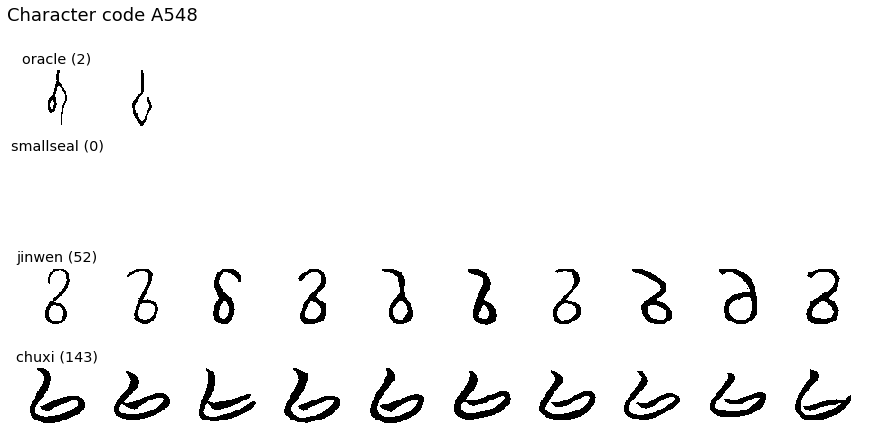

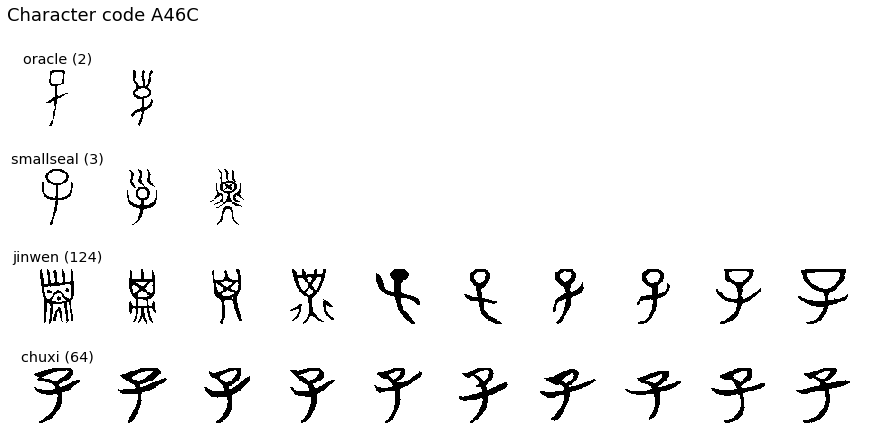

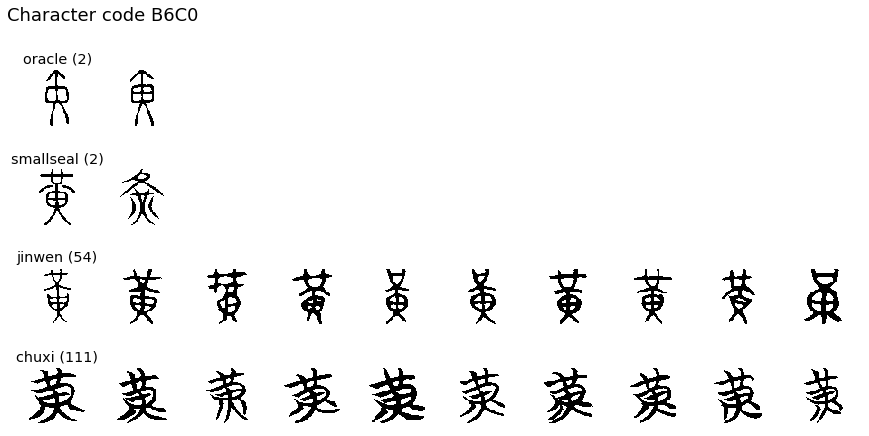

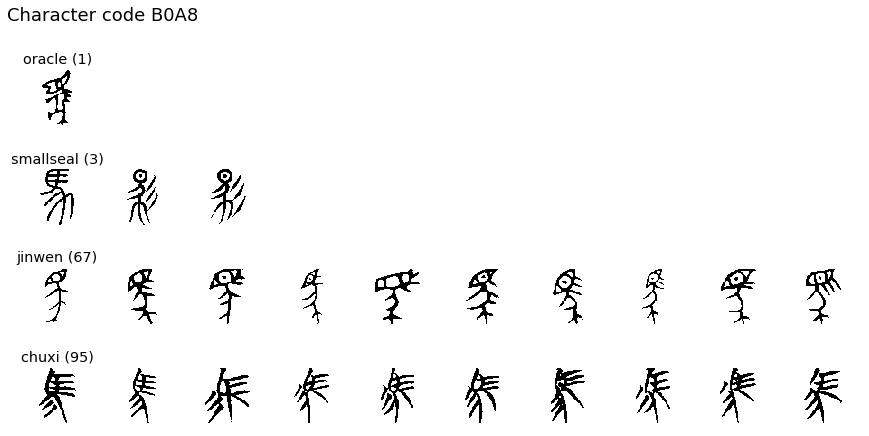

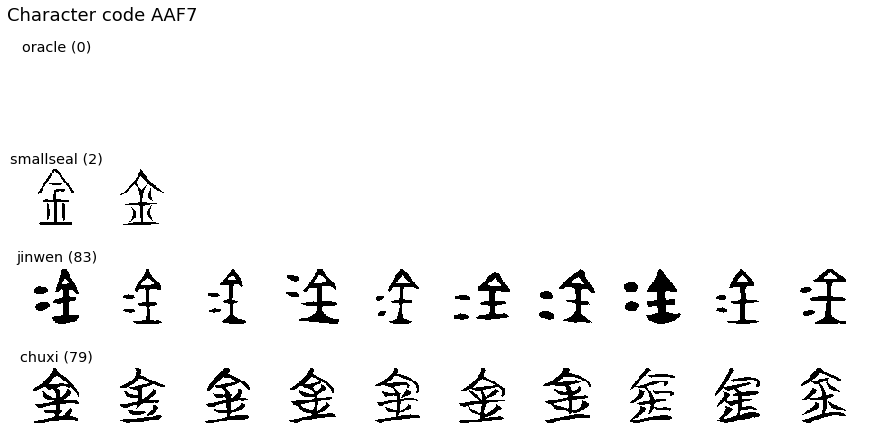

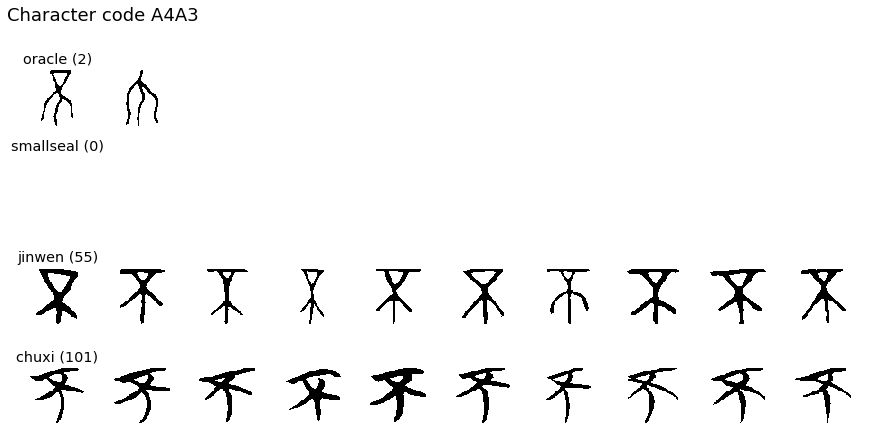

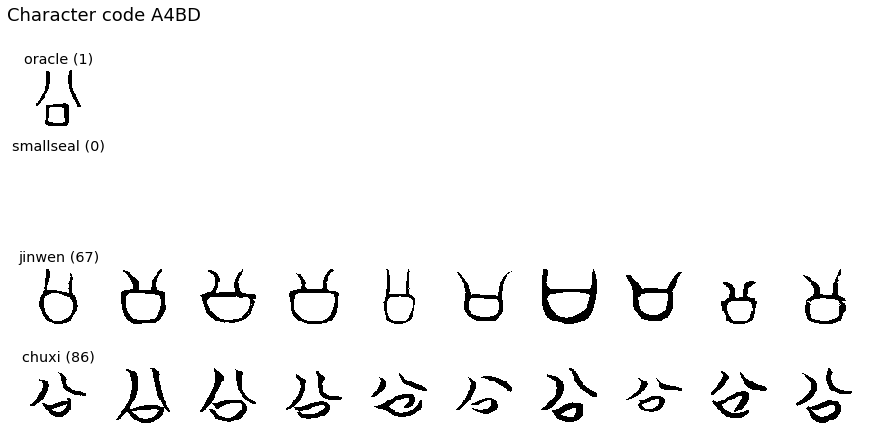

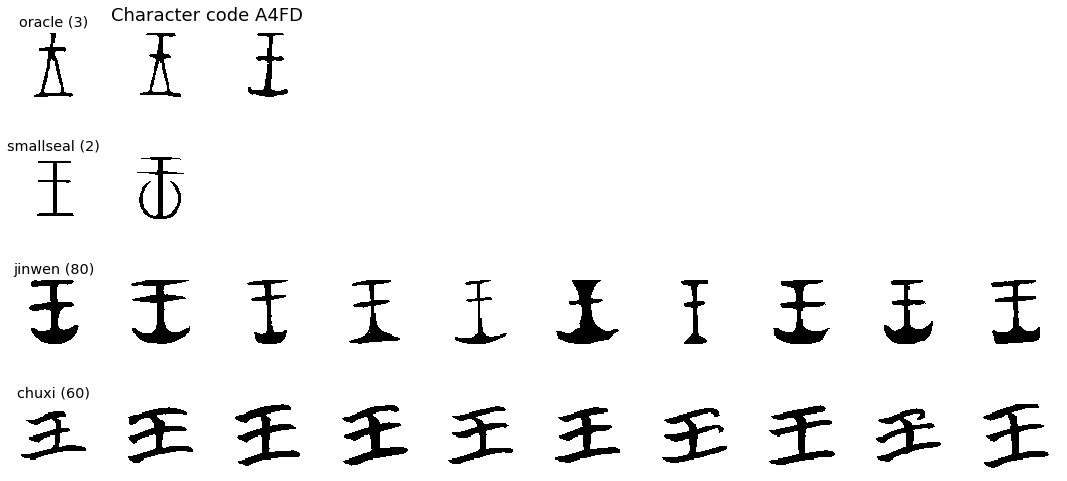

In [65]:
from PIL import Image

# view this many examples of each character code and era
numcols = 10 

# max number of characters to view
maxcodes = 20

# display examples of each of the most sampled codes
for code in okcodes[:maxcodes]:
    f, axes = plt.subplots(4,numcols,figsize=(15,7),subplot_kw={'xticks': [], 'yticks': [], 'fc':'none'})
    f.suptitle('Character code %X'%(code), x=.2, fontsize=18)
    # display examples of each era, if there are any
    for era,eranum in zip(['oracle', 'smallseal', 'jinwen', 'chuxi'], range(4)):
        paths = df.path[(df.code==code) & (df.era==era)].values
        # check whether there are any examples
        if paths.shape[0]:
            # display up to numcols examples
            for i in range(min(numcols,paths.shape[0])):
                axes[eranum, i].imshow(Image.open(paths[i]))
                
        axes[eranum, 0].set_title(era+' (%d)'%paths.shape[0]);
    
    plt.show();

plt.tight_layout();           
